## Train a deep MLP on the MNIST dataset and get over 98% accuracy

In [1]:
from keras.datasets.mnist import load_data

mnist = load_data()
X_train = mnist[0][0]
y_train = mnist[0][1]
X_test = mnist[1][0]
y_test = mnist[1][1]

In [2]:
import numpy as np

len(np.unique(y_train))

10

In [3]:
import tensorflow as tf
test = 0.1
test = test * tf.math.exp(-0.1) 
test

Metal device set to: Apple M1


2022-09-04 13:59:37.258911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-04 13:59:37.259216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(), dtype=float32, numpy=0.09048374>

In [4]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.convolutional.Conv2D(input_shape=(28,28,1),activation='relu', filters=28, kernel_size=3))
model.add(layers.MaxPool2D(3))
model.add(layers.convolutional.Conv2D(activation='relu', filters=56, kernel_size=3))
model.add(layers.MaxPool2D(3))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [5]:
import os

my_logs = os.path.join(os.curdir, 'my_logs')
root_logdir = os.path.join(my_logs, 'NN_MNIST')

In [6]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [7]:
run_logdir = get_run_logdir()

In [8]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[tensorboard_cb])

Epoch 1/20


2022-09-04 13:59:58.150907: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-04 13:59:58.310071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 1.0519 - accuracy: 0.8379

2022-09-04 14:00:15.229025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 10ms/step - loss: 1.0507 - accuracy: 0.8381 - val_loss: 0.3394 - val_accuracy: 0.9566
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2323 - accuracy: 0.9601 - val_loss: 0.1487 - val_accuracy: 0.9740
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1321 - accuracy: 0.9720 - val_loss: 0.0962 - val_accuracy: 0.9800
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0958 - accuracy: 0.9783 - val_loss: 0.0782 - val_accuracy: 0.9825
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0781 - accuracy: 0.9812 - val_loss: 0.0725 - val_accuracy: 0.9810
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0661 - accuracy: 0.9839 - val_loss: 0.0586 - val_accuracy: 0.9853
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0580 - accuracy: 0.9855 - val_loss: 0.0567 - val_accura

In [9]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [10]:
History = model.history.history
print(History['accuracy'][9], History['val_accuracy'][9])

0.9891833662986755 0.9871000647544861


Text(0, 0.5, 'val_accuracy')

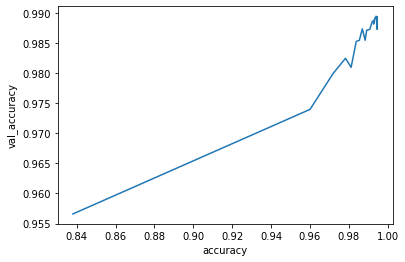

In [11]:
import matplotlib.pyplot as plt

plt.plot(History['accuracy'], History['val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')

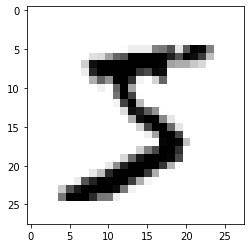

In [12]:
plt.imshow(X_train[0], cmap='binary')